<a href="https://colab.research.google.com/github/javiagu13/DeepLearning/blob/main/lab6_generatorJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 Using the Image Generator and Fit Generator
Code courtesy of deeplearning.ai (Laurence Moroney)


## A. Downloading and organising the images into directories

### 0. Download the images

This code will download the images of horses and humans into the /tmp/ directory of the host machine

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-10-18 08:26:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   123MB/s    in 1.2s    

2020-10-18 08:26:45 (123 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



Download the images for the validation dataset

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-10-18 08:26:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-10-18 08:26:45 (78.7 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data to the specified directories. 

In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

The contents of the .zip are extracted to the base directory `/tmp/horse-or-human`, which contains `horses` and `humans` subdirectories.


### 2. Create directories for the images

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like in the `horses` and `humans` training directories:

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse08-3.png', 'horse45-4.png', 'horse09-1.png', 'horse01-5.png', 'horse07-0.png', 'horse26-1.png', 'horse43-5.png', 'horse29-8.png', 'horse04-5.png', 'horse06-3.png']
['human16-04.png', 'human09-27.png', 'human11-16.png', 'human14-14.png', 'human02-23.png', 'human04-11.png', 'human03-16.png', 'human09-03.png', 'human07-05.png', 'human16-09.png']
['horse4-232.png', 'horse5-303.png', 'horse5-002.png', 'horse2-254.png', 'horse6-218.png', 'horse2-582.png', 'horse1-539.png', 'horse4-302.png', 'horse4-548.png', 'horse5-400.png']
['valhuman05-01.png', 'valhuman03-02.png', 'valhuman01-20.png', 'valhuman02-15.png', 'valhuman01-24.png', 'valhuman02-17.png', 'valhuman03-13.png', 'valhuman05-04.png', 'valhuman05-14.png', 'valhuman05-26.png']


Let's find out the total number of horse and human images in the directories:

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


### 3. Visualising the images
Let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

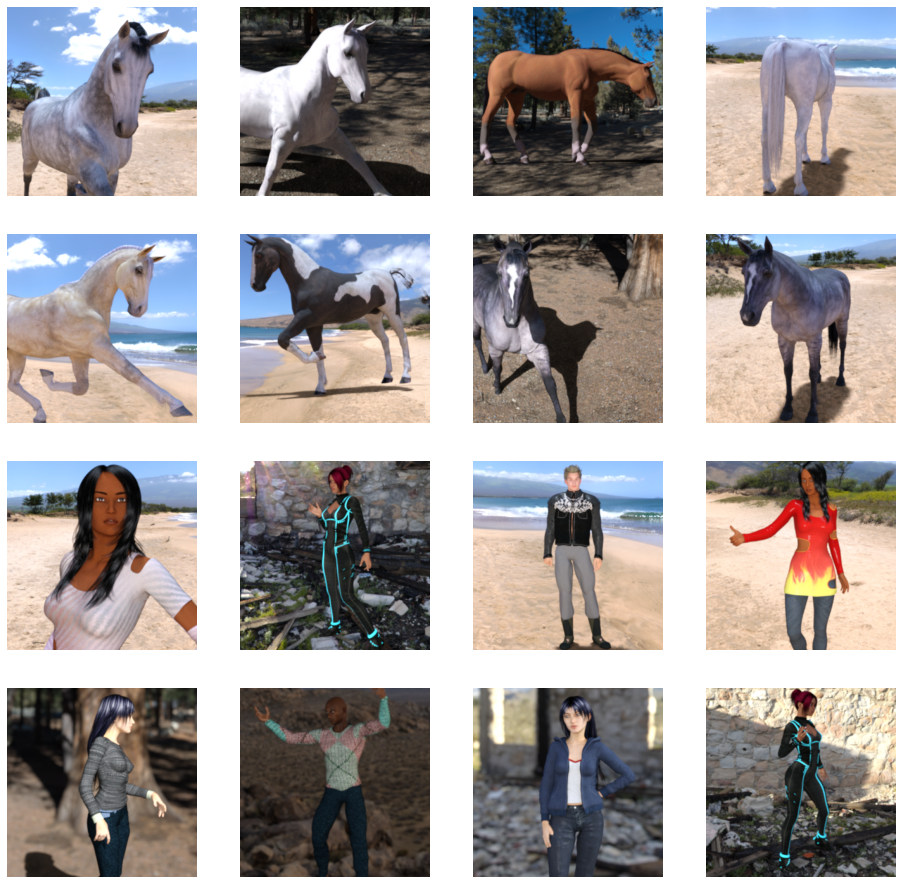

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


1.Why do you think these images are loaded into the directories in a systematic fashion? 
-to be able to distinguish them while training and testing

2.What is the name of the parent directory that contains the training images of horses? 
-there are two: tmp/horse-or-human and tmp/validation-horse-or-human

3.What is the total number of training images of both horses and humans? What about the total number of validation images? 
-128 horses and 128 humans in validation files. 500 horses and 527 humans in the training images.

4.From the visualisations, do you think the images are real or generated?
-They dont look like real photos, they must have been somehow generated

## B. Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [ ]:
import tensorflow as tf

### 1. Define Neural Network Model using CNNs
Define convolutional layers, and flatten the final result to feed into the densely connected layers.

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#1.Look at the way this model is defined. How many convolutional layers are there? Why are there more convolutional layers here than in the fashion_mnist or MNIST datasets? 
#Answer: four layers, they are more layers because the amount of pictures is less, this way it has to analyze more each image to get a better result
#2.Why is the activation function in the last layer a sigmoid? What will the sigmoid function return? 
#Answer:
#3.Confirm the number of parameters in each layer from the model’s summary based on the formula that you have learned. 
#Answer:

In [ ]:
##JUST FOR EXERCISE 6
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### 2. View the NN's summary
The model.summary() method call prints a summary of the NN 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

### 3. Configure the specifications for model training

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### 4. Data Preprocessing

COMPLETE THE CODE CELL BELOW

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen: all images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
# validation_datagen: all images will be rescaled by 1./255
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        directory = "/tmp/horse-or-human",
        # directory = # TODO: This is the source directory for training images
        target_size = (300,300), # TODO: Define the target_size here
        batch_size = 128, # TODO: Define the batch_size here to be 128
        class_mode = 'binary'# TODO: Since we use binary_crossentropy loss, we need binary labels
)

# Flow training images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
         directory = "/tmp/validation-horse-or-human",
        # directory = # TODO: This is the source directory for training images
        target_size = (300,300), # TODO: Define the target_size here
        batch_size = 128, # TODO: Define the batch_size here to be 128
        class_mode = 'binary'# TODO: Since we use binary_crossentropy loss, we need binary labels
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
##JUST FOR EXERCISE 6
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen: all images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
# validation_datagen: all images will be rescaled by 1./255
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        directory = "/tmp/horse-or-human",
        # directory = # TODO: This is the source directory for training images
        target_size = (150,150), # TODO: Define the target_size here
        batch_size = 128, # TODO: Define the batch_size here to be 128
        class_mode = 'binary'# TODO: Since we use binary_crossentropy loss, we need binary labels
)

# Flow training images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
         directory = "/tmp/validation-horse-or-human",
        # directory = # TODO: This is the source directory for training images
        target_size = (150,150), # TODO: Define the target_size here
        batch_size = 128, # TODO: Define the batch_size here to be 128
        class_mode = 'binary'# TODO: Since we use binary_crossentropy loss, we need binary labels
)
##ANSWER EXERCISE 6: 
#Do you notice if training is faster now? 
#-Not really
#What does it mean when you see extremely high accuracy values for training?
#-That the model is performing really well and outputs what it is expected

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### 5. Training
Let's train for 15 epochs -- this may take a few minutes to run.

Note the values per epoch.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. 

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 21s 3s/step - loss: 1.7445 - accuracy: 0.5662 - val_loss: 2.0675 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 20s 2s/step - loss: 0.8580 - accuracy: 0.7314
Epoch 3/15
8/8 [==============================] - 18s 2s/step - loss: 0.7522 - accuracy: 0.6952
Epoch 4/15
8/8 [==============================] - 18s 2s/step - loss: 0.3822 - accuracy: 0.8398
Epoch 5/15
8/8 [==============================] - 18s 2s/step - loss: 0.1425 - accuracy: 0.9433
Epoch 6/15
8/8 [==============================] - 18s 2s/step - loss: 0.0784 - accuracy: 0.9722
Epoch 7/15
8/8 [==============================] - 17s 2s/step - loss: 0.2633 - accuracy: 0.8988
Epoch 8/15
8/8 [==============================] - 17s 2s/step - loss: 0.1327 - accuracy: 0.9477
Epoch 9/15
8/8 [==============================] - 17s 2s/step - loss: 0.2292 - accuracy: 0.9132
Epoch 10/15
8/8 [==============================] - 20s 2s/step - loss: 0.5407 - accuracy: 0.87

### 6. Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving mare-561221_1920.jpg to mare-561221_1920 (1).jpg
[1.]
mare-561221_1920.jpg is a human


### 7. Visualizing Intermediate Representations

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a different training image.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


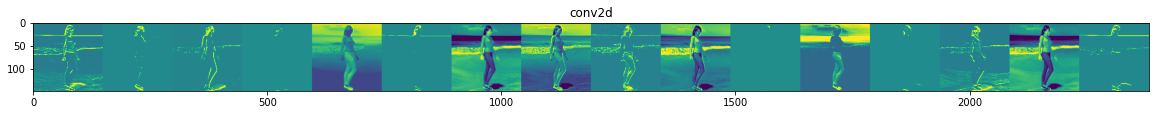

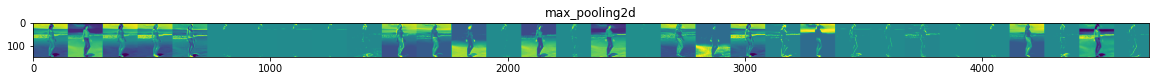

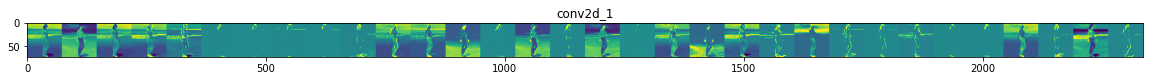

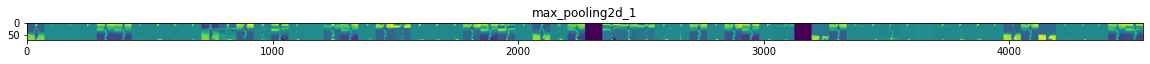

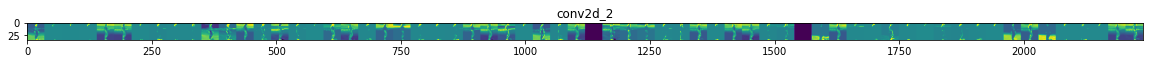

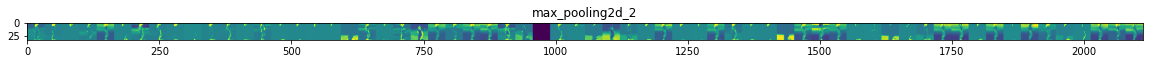

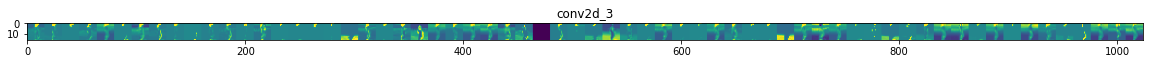

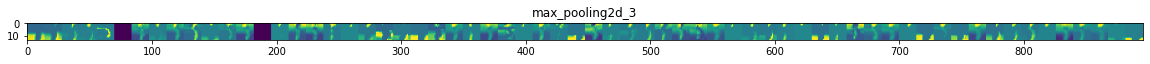

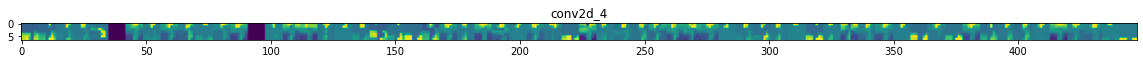

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

### 8. Clean Up

Run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

In [ ]:
##1.Why do you think these images are loaded into the directories in a systematic fashion?
##-because it is needed for separating images into types so that we can train and test knowing what is inside
##2.What is the name of the parent directory that contains the training images of horses? 
##-horse-or-human
##3.What is the total number of training images of both horses and humans? What about the total number of validation images?
##-1047 images in horses and humans. 254 images on validation
##4.From the visualisations, do you think the images are real or generated? 
##-generated